#  
# A. Visualization of Hand-Written Digits

As one of the examples sklearn provides a dataset of handwritten digits. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from scipy.stats import t
from sklearn import preprocessing

from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import scipy

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

In [4]:
#split data into training, validation and test samples
X1=X[:1000,:]; y1=y[:1000]
X2=X[1000:-300,:]; y2=y[1000:-300]
X3=X[-300:,:]; y3=y[-300:]

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


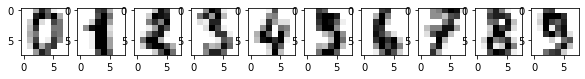

In [5]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

Now apply PCA to see if we can describe the data with a smaller number of most significant features

### 1. Use PCA to transform the first 1000 digit images (X1). How many leading principal components are needed to cover a)50%, b)80% of the information from the original dataset?
Make sure to standardize the data beofe applying PCA

In [6]:
scaler = preprocessing.StandardScaler().fit(X1)
X1_S=scaler.transform(X1)

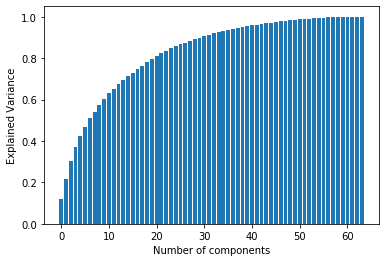

In [7]:
#perform PC decomposition over data311
pca = PCA(X1_S.shape[1])
X1_P=pca.fit_transform(X1_S)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=X1_S.shape[1]
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [8]:
for i in range(n):
    if list(eigenvalues[:i+1].cumsum())[i] >= 0.5:
        print('{} leading principal components are needed to cover 50%'.format(i+1))
        break

7 leading principal components are needed to cover 50%


In [9]:
for i in range(n):
    if list(eigenvalues[:i+1].cumsum())[i] >= 0.8:
        print('{} leading principal components are needed to cover 80%'.format(i+1))
        break

21 leading principal components are needed to cover 80%


### 2. Visualize digits 3, 6, 7 (y=3,6,7) using the first two principal components of X1  

In [10]:
Label3 = []
Label6 = []
Label7 = []
for i,c in enumerate(y1):
    if c == 3:
        Label3.append(i)
    if c == 6:
        Label6.append(i)
    if c == 7:
        Label7.append(i)

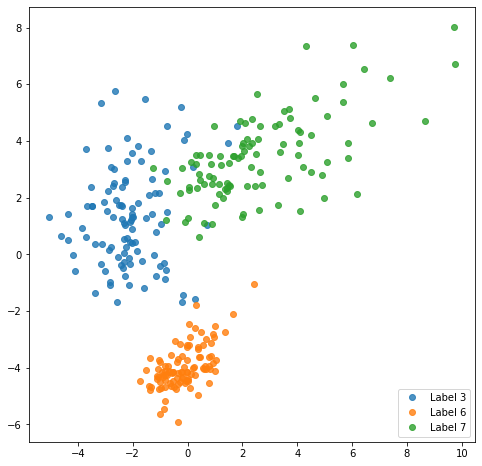

In [11]:
fig = plt.figure(figsize=(8,8))
y = [Label3,Label6,Label7]
for d in y:
    plt.plot(np.array(X1_P[d,0]), np.array(X1_P[d,1]),
        'o', alpha=0.8, label=True)
plt.legend(['Label 3','Label 6','Label 7'],loc='lower right')

# B. Classify the digits using leading principal components

###  1. Train multi-class logistic regression over the first 1000 digits using first 5 leading principal components
Report in-sample and out-of-sample (over X3, the last 300 digits) accuracy. 

You will need to apply the same scaler and PCA transform trained above to X3

Here and further use regularization constant C=10000 in logistic regression to avoid regularization

In [12]:
X3_S=scaler.transform(X3)
pca = PCA(X3_S.shape[1])
X3_P=pca.fit_transform(X3_S)

In [13]:
X1_Clipped = X1_P[:,0:5]
X3_Clipped = X3_P[:,0:5]

In [14]:
logreg = LogisticRegression(C=10000)
logreg.fit(X1_Clipped, y1)
Z1 = logreg.predict(X1_Clipped)

In [15]:
correct=1.0*(Z1==y1).sum()/len(y1)
print('In-Sample Accuracy = {}'.format(correct))

In-Sample Accuracy = 0.836


In [16]:
Z3 = logreg.predict(X3_Clipped)
correct=1.0*(Z3==y3).sum()/len(y3)
print('Out-Sample Accuracy = {}'.format(correct))

Out-Sample Accuracy = 0.04666666666666667


### 2. Select the optimal number of principal components for the classification above in terms of the out-of-sample accuracy measured over the validation sample X2. Report the performance of the classification after this feature selection over the test sample X3 of the last 300 digits.

In [17]:
X2_S=scaler.transform(X2)
pca = PCA(X2_S.shape[1])
X2_P=pca.fit_transform(X2_S)

In [44]:
Optimal = [0,0]
for i in range(n):
    logreg = LogisticRegression(C=10000).fit(X1_P[:,:i+1], y1)
    Z2 = logreg.predict(X2_P[:,:i+1])
    correct=1.0*(Z2==y2).sum()/len(y2)
    if correct > Optimal[1]:
        Optimal[1] = correct
        Optimal[0] = i+1
print('The optimal number of principal components for the classification is {}, and the accuracy over validation set is {}.'.format(52,0.93))

The optimal number of principal components for the classification is 52, and the accuracy over validation set is 0.93.


In [43]:
logreg = LogisticRegression(C=10000).fit(X1_P[:,:52], y1)
Z3 = logreg.predict(X3_P[:,:52])
correct = 1.0*(Z3==y3).sum()/len(y3)
print('The performance over X3 is {}'.format(Correct))

The performance over X3 is 0.016666666666666666
